In [1]:
from gen_landscape import *
from population import *
from plot_data_v2 import *
import numpy as np
import datetime


In [2]:
#
mn = 1000
points_to_set_diamond = np.array([[mn, 0], [0, mn], [-mn, 0], [0, -mn], [0, 0]])
points_to_set_sqr = np.array([[mn, mn], [-mn, mn], [-mn, -mn], [mn, -mn], [0, 0]])
# pure concave
sz = 500
pure_concave = [-sz, -sz, -sz, -sz, 0]
concave_almost_1 = [-sz, -sz, -sz, 0, 0]
concave_almost_2 = [-sz, -sz, 0, 0, 0]
concave_almost_3 = [-sz, 0, -sz, 0, 0]
concave_almost_4 = [-sz, 0, 0, 0, 0]

flat = [0, 0, 0, 0, 0]

hill_slope = [-sz, -sz, sz, sz, 0]
saddle_almost_1 = [-sz, -sz, -sz, sz, 0]
saddle_almost_2 = [-sz, sz, sz, sz, 0]
assigned_saddle = [-sz, sz, -sz, sz, 0]

convex_almost_4 = [sz, 0, 0, 0, 0]
convex_almost_3 = [sz, 0, sz, 0, 0]
convex_almost_2 = [sz, sz, 0, 0, 0]
convex_almost_1 = [sz, sz, sz, 0, 0]
pure_convex = [sz, sz, sz, sz, 0]
#

In [13]:
#points_to_set = np.array([[mn, 0], [0, mn], [-mn, 0], [0, -mn], [0, 0], [mn, mn], [-mn, mn], [-mn, -mn], [mn, -mn]])
#assigned_values = np.array([sz,sz,sz,sz, 0, -sz, -sz, -sz, -sz])

points_to_set = points_to_set_sqr
assigned_values = convex_almost_4
land = Landscape2D(points_chosen=points_to_set, points_fitness_values=assigned_values, spline=True)

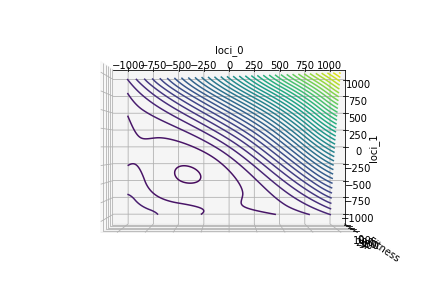

In [14]:
land.draw(elevation_deg=90, rotation_deg=-90)

In [75]:
gia = Population(population_size=10000, loci=2, gene_mean=0, gene_sd=10,
                 proportion_asexual=0.5, survival_rate=0.5, mutation_std=1, landscape=land)

In [76]:
camera1 = Camera()
frame_rate = 20
check_for_death = True
for i in range(1001):
    if check_for_death and (gia.population_sizes(asex=True)<100 or 
                            gia.population_sizes(sex=True)<100):
        print('someone won')
        print(gia.population_sizes(asex=True))
        break
    if i % 100 == 0:
        print('just completed iteration ',i)
    if i%frame_rate==0 or i in range(10):
        camera1.take_shot(gia)
    
    gia.mutation_stage()
    
    if True in np.isnan(gia.get_fitness(gia.total_pop_mat)):
        break
    
    gia.independent_survival_stage()
    gia.replication_stage(equal_species_size=False)
print(i)


just completed iteration  0
just completed iteration  100
just completed iteration  200
just completed iteration  300
just completed iteration  400
just completed iteration  500
just completed iteration  600
just completed iteration  700
just completed iteration  800
just completed iteration  900
just completed iteration  1000
1000


In [77]:
camera1.publish()



sucesfully loaded stuff


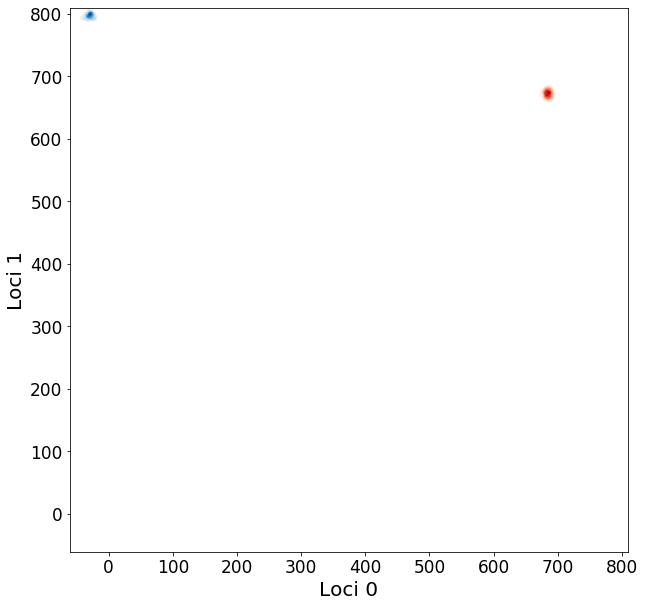

In [78]:
frame_range = range(0,np.max(list(camera1.camera_roll.keys())))
gia.fitness_stats()
filename = 'recombination_and_diagonality'
create_plot_file(frame_range, plot_asex=True, plot_sex=True, filename = filename)

In [79]:
print('hello')

hello
